## CAR PRICE PREDICTION
### OASIS Task 3
Prediction of CAR price.
The price of a car depends on a lot of factors like the goodwill of the brand of the car, 
features of the car, horsepower and the mileage it gives and many more. 
Car price prediction is one of the major research areas in machine learning. 
So if you want to learn how to train a car price prediction model then this project is for you.

### ----- siddharth nikam

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import f_oneway
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('CarPrice_Assignment.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [4]:
df.shape

(205, 26)

In [5]:
df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [6]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [7]:
df = df.drop(columns = 'car_ID')

In [8]:
df.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [9]:
numerical_features = df.select_dtypes(include=['int', 'float']).columns
categorical_features = df.select_dtypes(include=['object']).columns

In [10]:
numerical_data = df[numerical_features]
numerical_summary = numerical_data.describe()
print("Numerical Features Summary:")
print(numerical_summary)

Numerical Features Summary:
        symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000   
mean     0.834146   98.756585  174.049268   65.907805   53.724878   
std      1.245307    6.021776   12.337289    2.145204    2.443522   
min     -2.000000   86.600000  141.100000   60.300000   47.800000   
25%      0.000000   94.500000  166.300000   64.100000   52.000000   
50%      1.000000   97.000000  173.200000   65.500000   54.100000   
75%      2.000000  102.400000  183.100000   66.900000   55.500000   
max      3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844    0.313597          3.972040   
min    1488.000000   61.000000    2.540000    

In [11]:
categorical_data = df[categorical_features]
categorical_counts = categorical_data.nunique()
print("\nCategorical Features Counts:")
print(categorical_counts)


Categorical Features Counts:
CarName           147
fueltype            2
aspiration          2
doornumber          2
carbody             5
drivewheel          3
enginelocation      2
enginetype          7
cylindernumber      7
fuelsystem          8
dtype: int64


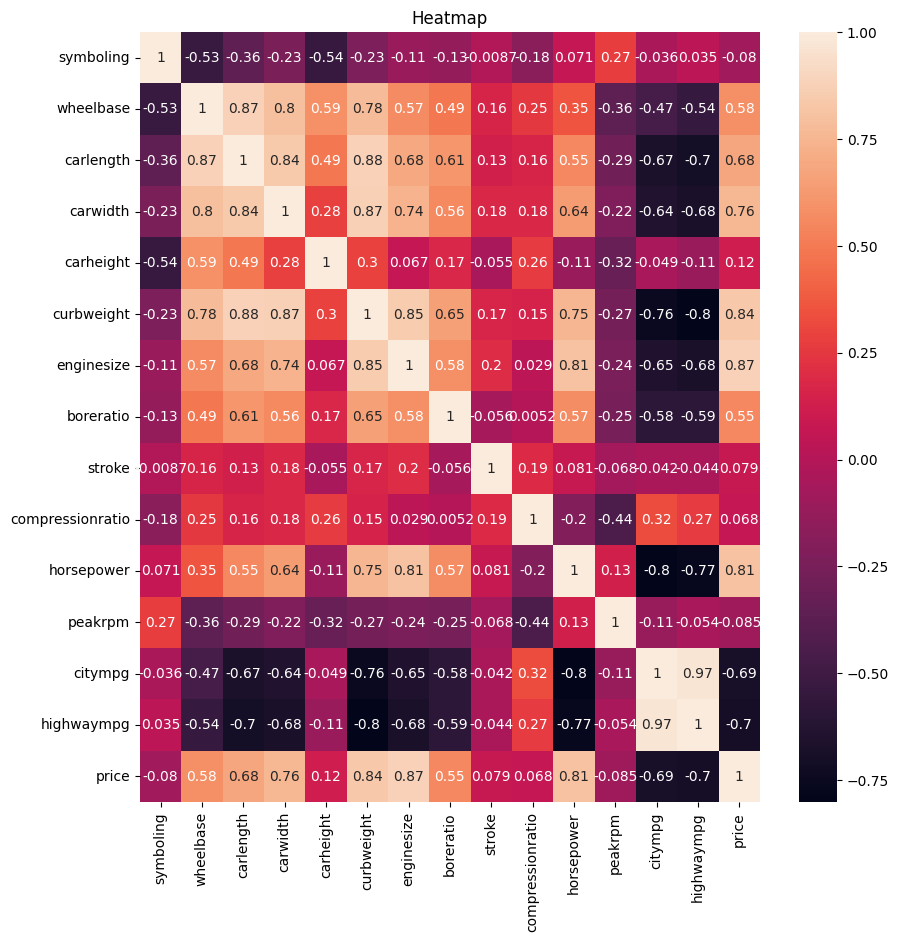

In [12]:
plt.figure(figsize=(10, 10))
sns.heatmap(numerical_data.corr(), annot=True)
plt.title("Heatmap")
plt.show()

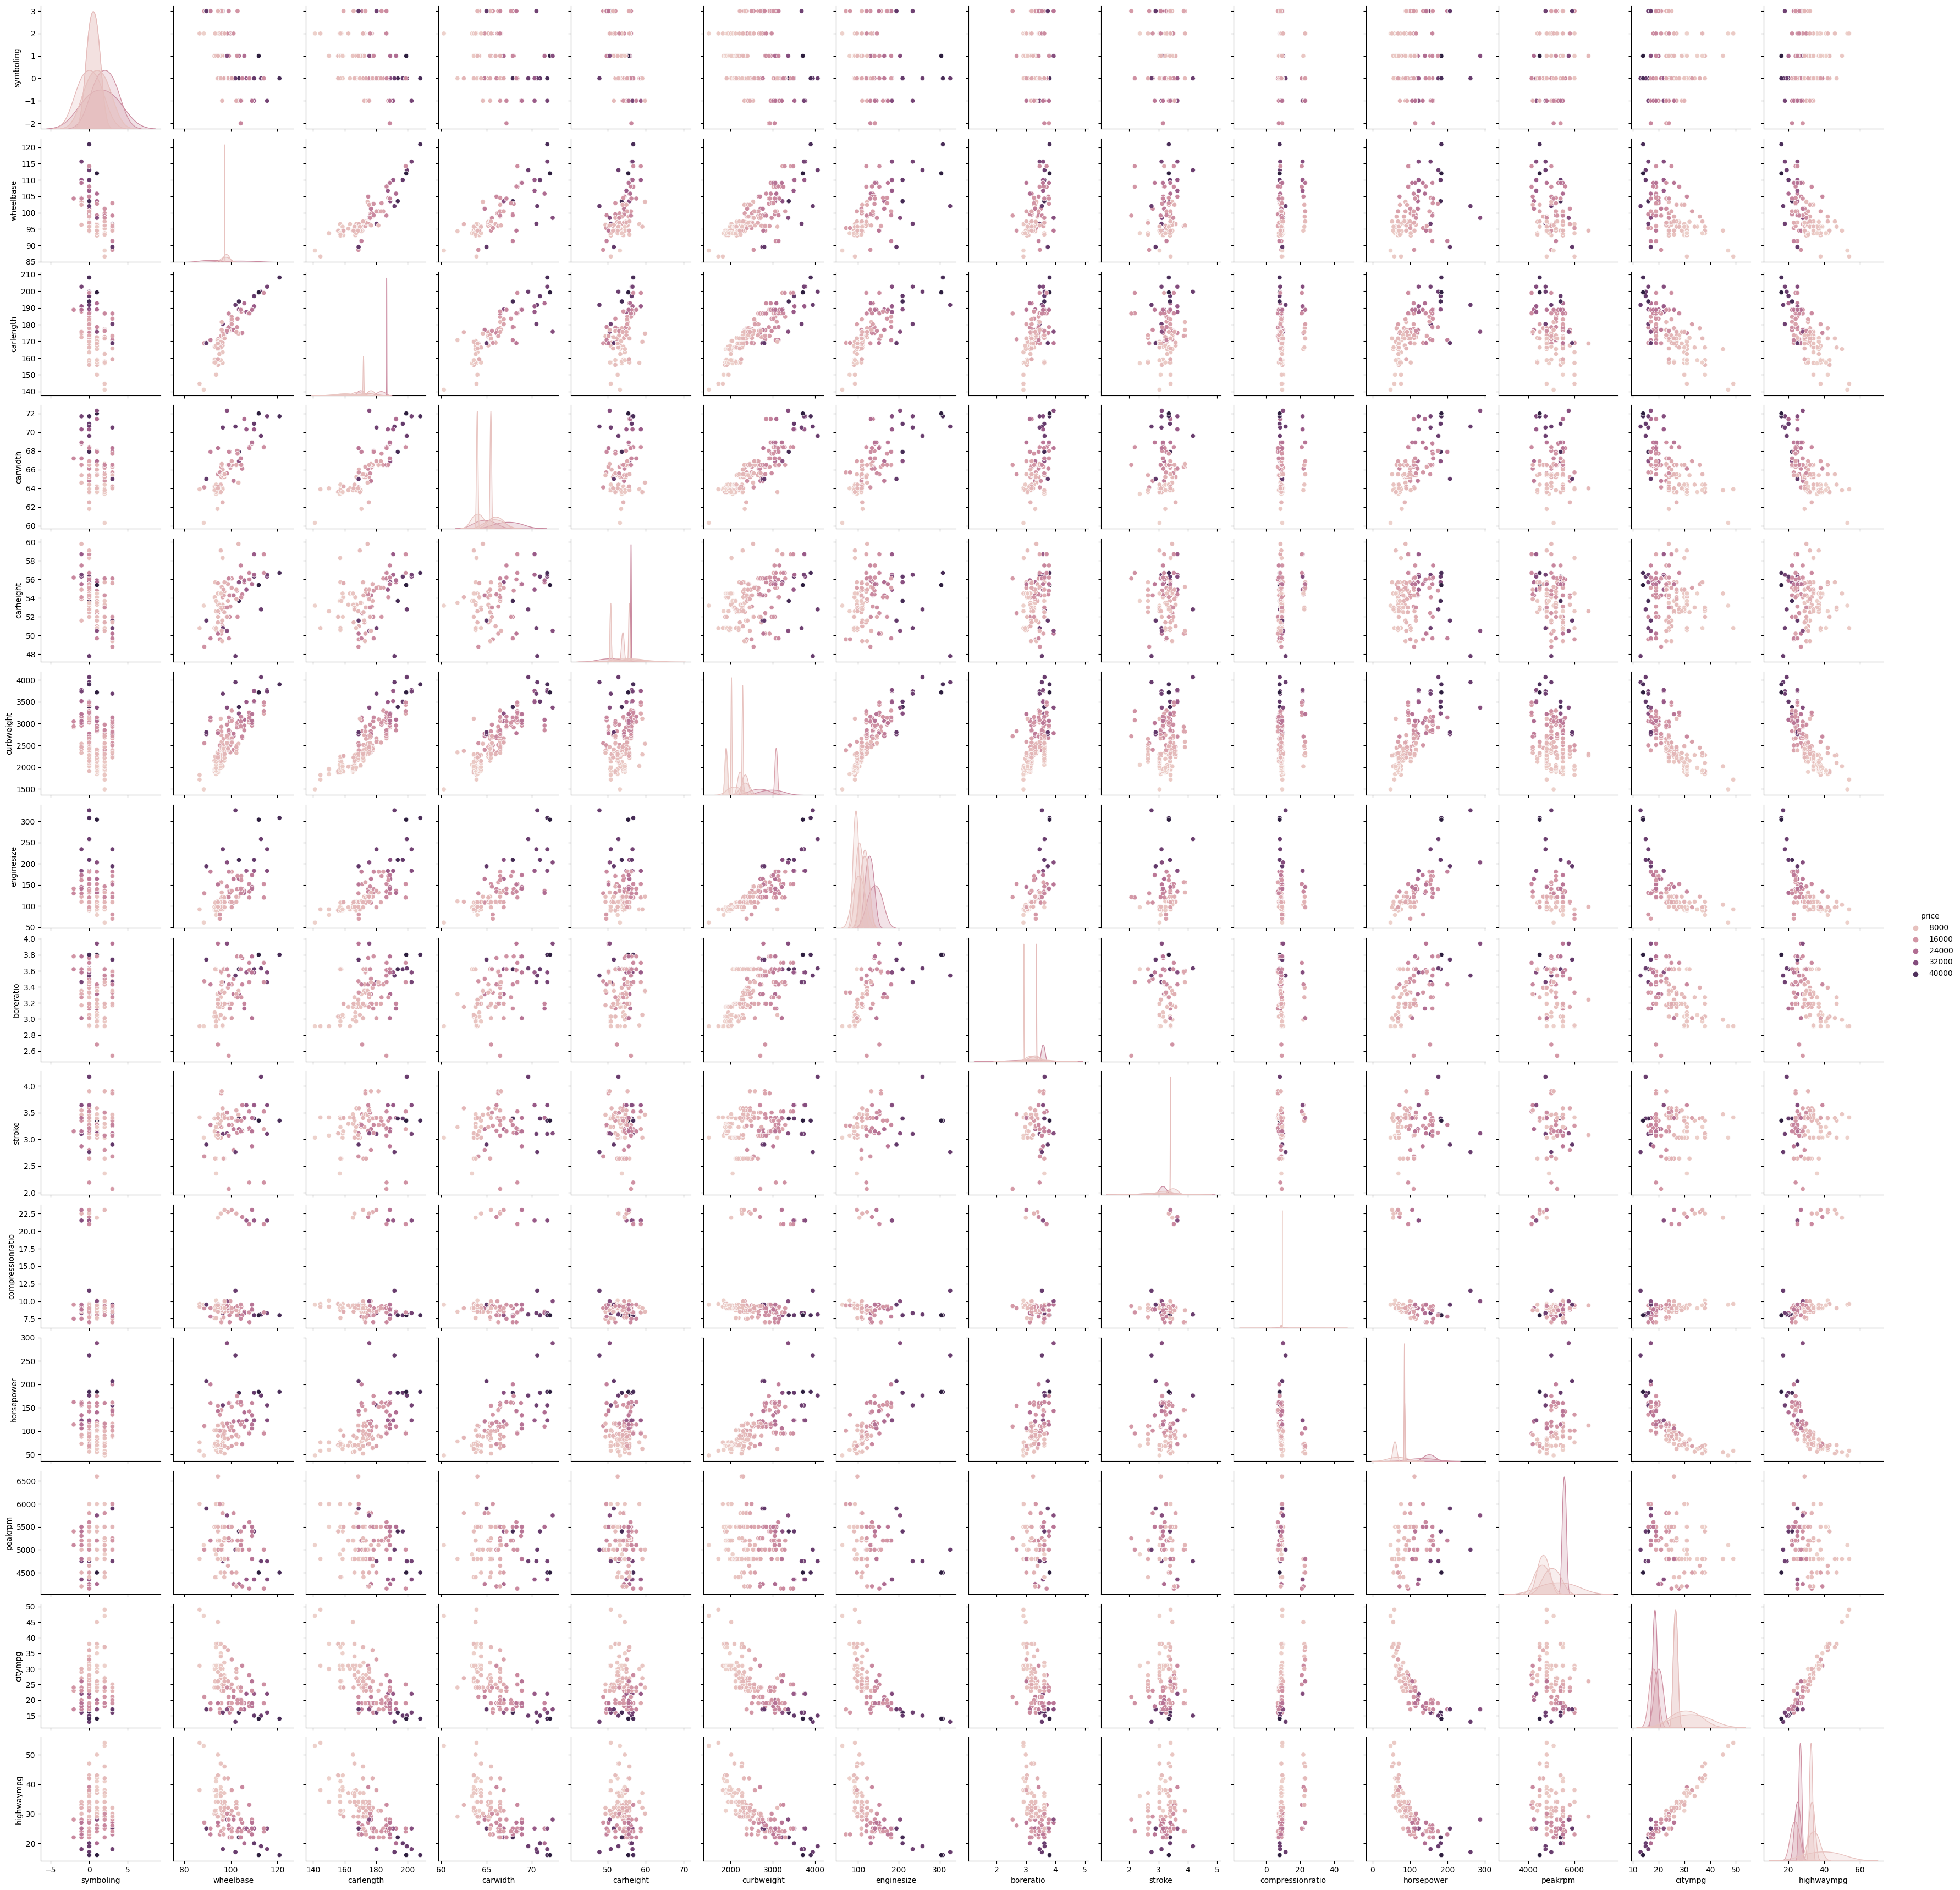

In [13]:
sns.pairplot(df,hue='price')

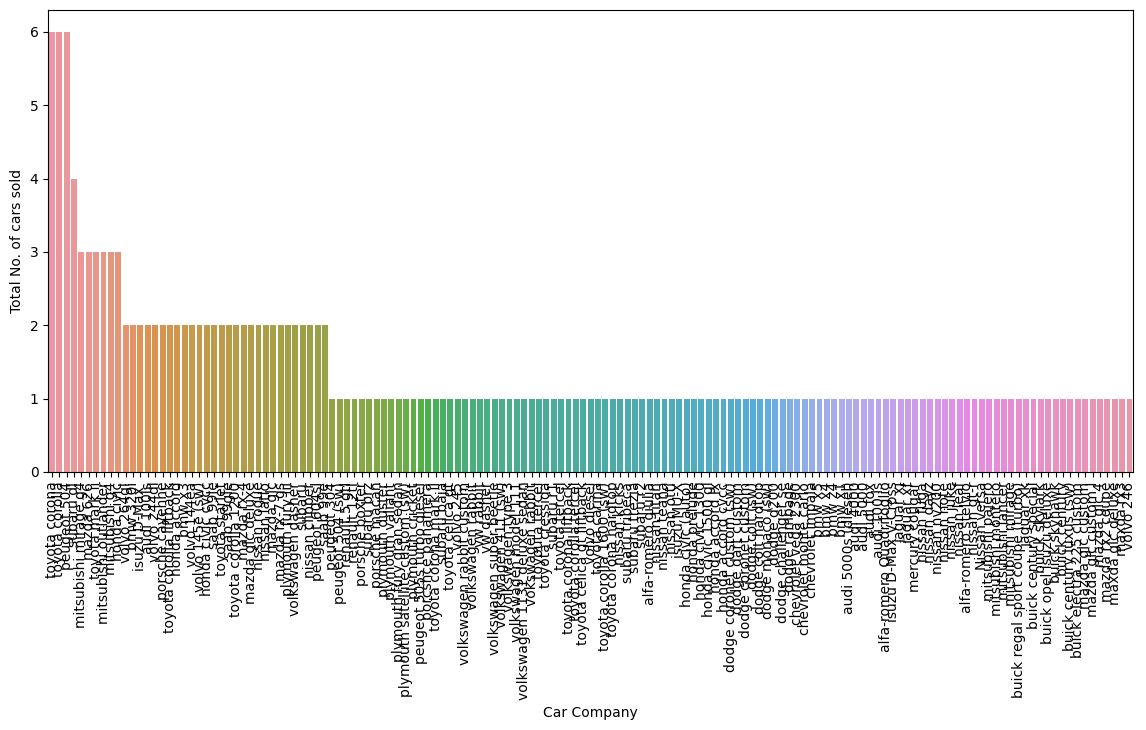

In [14]:
plt.figure(figsize=(14,6))
counts = df["CarName"].value_counts()
sns.barplot(x=counts.index, y=counts.values)
plt.xlabel("Car Company")
plt.ylabel("Total No. of cars sold")
plt.xticks(rotation=90)
plt.show()

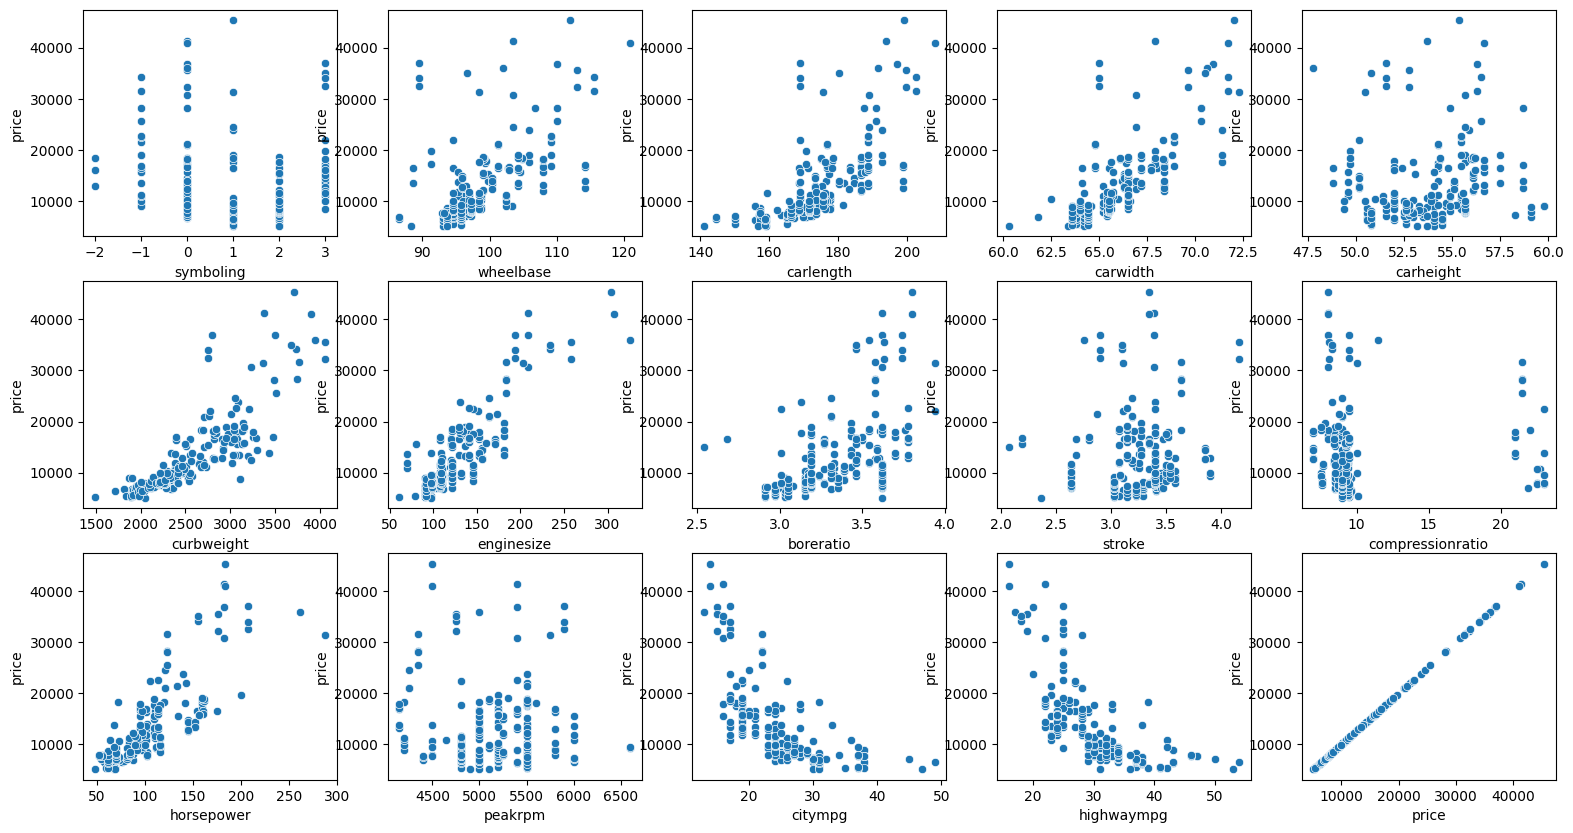

In [15]:
fig, axs = plt.subplots(3, 5, figsize=(19, 10))
axs = axs.flatten()
for i, feature in enumerate(numerical_data.columns):
    sns.scatterplot(data=df, x=feature, y='price', ax=axs[i])

In [16]:
corr_matrix = numerical_data.corr()
correlation_with_target = corr_matrix['price'].abs()
sorted_features = correlation_with_target.sort_values(ascending=False)
print(sorted_features)

price               1.000000
enginesize          0.874145
curbweight          0.835305
horsepower          0.808139
carwidth            0.759325
highwaympg          0.697599
citympg             0.685751
carlength           0.682920
wheelbase           0.577816
boreratio           0.553173
carheight           0.119336
peakrpm             0.085267
symboling           0.079978
stroke              0.079443
compressionratio    0.067984
Name: price, dtype: float64


In [17]:
numerical_data.columns

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [18]:
continous_features = ['wheelbase', 'enginesize', 'boreratio']
df2 = df[['wheelbase', 'enginesize', 'boreratio','price']]

In [19]:
df2.head()

,wheelbase,enginesize,boreratio,price
0,88.6,130,3.47,13495.0
1,88.6,130,3.47,16500.0
2,94.5,152,2.68,16500.0
3,99.8,109,3.19,13950.0
4,99.4,136,3.19,17450.0


In [20]:
categorical_data.head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [21]:
for feature in categorical_data.columns:
    print(feature)
    print(categorical_data[feature].unique())

CarName
['alfa-romero giulia' 'alfa-romero stelvio' 'alfa-romero Quadrifoglio'
 'audi 100 ls' 'audi 100ls' 'audi fox' 'audi 5000' 'audi 4000'
 'audi 5000s (diesel)' 'bmw 320i' 'bmw x1' 'bmw x3' 'bmw z4' 'bmw x4'
 'bmw x5' 'chevrolet impala' 'chevrolet monte carlo' 'chevrolet vega 2300'
 'dodge rampage' 'dodge challenger se' 'dodge d200' 'dodge monaco (sw)'
 'dodge colt hardtop' 'dodge colt (sw)' 'dodge coronet custom'
 'dodge dart custom' 'dodge coronet custom (sw)' 'honda civic'
 'honda civic cvcc' 'honda accord cvcc' 'honda accord lx'
 'honda civic 1500 gl' 'honda accord' 'honda civic 1300' 'honda prelude'
 'honda civic (auto)' 'isuzu MU-X' 'isuzu D-Max ' 'isuzu D-Max V-Cross'
 'jaguar xj' 'jaguar xf' 'jaguar xk' 'maxda rx3' 'maxda glc deluxe'
 'mazda rx2 coupe' 'mazda rx-4' 'mazda glc deluxe' 'mazda 626' 'mazda glc'
 'mazda rx-7 gs' 'mazda glc 4' 'mazda glc custom l' 'mazda glc custom'
 'buick electra 225 custom' 'buick century luxus (sw)' 'buick century'
 'buick skyhawk' 'buick ope

In [22]:
features_with_two_categories = ['fueltype','aspiration','doornumber','enginelocation']
encoded_df = pd.get_dummies(categorical_data, columns = features_with_two_categories)
encoded_df.head()

,CarName,carbody,drivewheel,enginetype,cylindernumber,fuelsystem,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,enginelocation_front,enginelocation_rear
0,alfa-romero giulia,convertible,rwd,dohc,four,mpfi,0,1,1,0,0,1,1,0
1,alfa-romero stelvio,convertible,rwd,dohc,four,mpfi,0,1,1,0,0,1,1,0
2,alfa-romero Quadrifoglio,hatchback,rwd,ohcv,six,mpfi,0,1,1,0,0,1,1,0
3,audi 100 ls,sedan,fwd,ohc,four,mpfi,0,1,1,0,1,0,1,0
4,audi 100ls,sedan,4wd,ohc,five,mpfi,0,1,1,0,1,0,1,0


In [23]:
from sklearn.preprocessing import OrdinalEncoder
features_with_more_categories = ['carbody','drivewheel','enginetype','fuelsystem']
category_data = categorical_data[['cylindernumber']]
encoder = OrdinalEncoder()
encoder.fit(category_data)
encoded_data = encoder.transform(category_data)
encoded_data = encoder.transform(category_data)
encoded_df_cylindernumber = pd.DataFrame(encoded_data, columns=['cylindernumber'])
encoded_df['cylindernumber'] = encoded_df_cylindernumber['cylindernumber']

In [24]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for feature in features_with_more_categories:
    encoded_df[feature] = encoder.fit_transform(categorical_data[feature])
final_df = pd.concat([encoded_df,df2],axis = 1)
final_df.head()

,CarName,carbody,drivewheel,enginetype,cylindernumber,fuelsystem,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,enginelocation_front,enginelocation_rear,wheelbase,enginesize,boreratio,price
0,alfa-romero giulia,0,2,0,2.0,5,0,1,1,0,0,1,1,0,88.6,130,3.47,13495.0
1,alfa-romero stelvio,0,2,0,2.0,5,0,1,1,0,0,1,1,0,88.6,130,3.47,16500.0
2,alfa-romero Quadrifoglio,2,2,5,3.0,5,0,1,1,0,0,1,1,0,94.5,152,2.68,16500.0
3,audi 100 ls,3,1,3,2.0,5,0,1,1,0,1,0,1,0,99.8,109,3.19,13950.0
4,audi 100ls,3,0,3,1.0,5,0,1,1,0,1,0,1,0,99.4,136,3.19,17450.0


In [25]:
targetline = df2['price']

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df2[continous_features])
scaled_df = pd.DataFrame(scaled_features, columns=continous_features)
final_df = pd.concat([encoded_df, scaled_df,targetline], axis=1)

In [27]:
final_df=final_df.drop(['CarName'], axis=1)
final_df

,carbody,drivewheel,enginetype,cylindernumber,fuelsystem,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,enginelocation_front,enginelocation_rear,wheelbase,enginesize,boreratio,price
0,0,2,0,2.0,5,0,1,1,0,0,1,1,0,-1.690772,0.074449,0.519071,13495.0
1,0,2,0,2.0,5,0,1,1,0,0,1,1,0,-1.690772,0.074449,0.519071,16500.0
2,2,2,5,3.0,5,0,1,1,0,0,1,1,0,-0.708596,0.604046,-2.404880,16500.0
3,3,1,3,2.0,5,0,1,1,0,1,0,1,0,0.173698,-0.431076,-0.517266,13950.0
4,3,0,3,1.0,5,0,1,1,0,1,0,1,0,0.107110,0.218885,-0.517266,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,3,2,3,2.0,5,0,1,1,0,1,0,1,0,1.721873,0.339248,1.666445,16845.0
201,3,2,3,2.0,5,0,1,0,1,1,0,1,0,1.721873,0.339248,1.666445,19045.0
202,3,2,5,3.0,5,0,1,1,0,1,0,1,0,1.721873,1.109571,0.926204,21485.0
203,3,2,3,3.0,3,1,0,0,1,1,0,1,0,1.721873,0.435538,-1.183483,22470.0


In [28]:
X = final_df.drop(columns = 'price')
Y = final_df['price']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state = 23)
model = LinearRegression()
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(Y_test,y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 12352295.218466675


In [29]:
import statsmodels.api as sm

X2 = sm.add_constant(X)
estimate = sm.OLS(Y, X2)
estimate2 = estimate.fit()
print(estimate2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     81.79
Date:                Mon, 14 Aug 2023   Prob (F-statistic):           1.10e-68
Time:                        13:27:29   Log-Likelihood:                -1946.9
No. Observations:                 205   AIC:                             3920.
Df Residuals:                     192   BIC:                             3963.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 5869.9364 